##### Importing *`Global Libraries`*

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### `Viability` Classification

##### Loading *`battlestats`* and *`dex`* datasets from *`json`* format and arranging them in a `pandas dataframe`

In [28]:
# Loading the dataset
with open('./datasets/battlestats.json') as f:
    battlestats = json.load(f)

with open('./datasets/dex.json') as f:
    dex = json.load(f)

# Creating DataFrame and extracting data from json
data = battlestats['data']
df = pd.DataFrame()

for i in data:
    abilities = []
    for j in data[i]['Abilities']:
        abilities.append({j: data[i]['Abilities'][j]})
    abilities = [abilities]

    abilities = pd.DataFrame([abilities], columns=['Abilities'], index=[i])
    abilities['Pokemon'] = i
    abilities['Usage'] = data[i]['usage']
    abilities['RowCount'] = data[i]['Raw count']
    Happiness = []
    for j in data[i]['Happiness']:
        Happiness.append({j: data[i]['Happiness'][j]})

    Happiness = [Happiness]
    abilities['Happiness'] = Happiness
    for k in range(0, 4):
        abilities[f'Viability Ceiling {k}'] = data[i]['Viability Ceiling'][k]

    Teammates = []
    for j in data[i]['Teammates']:
        Teammates.append({j: data[i]['Teammates'][j]})
    Teammates = [Teammates]
    abilities['Teammates'] = Teammates
    name = i.lower()
    # if name contain any non alphanumeric character replace it with ''
    name = ''.join(e for e in name if e.isalpha())
    Types = []
    for j in dex[name]['types']:
        Types.append(j)
    Types = [Types]
    abilities['Types'] = Types
    abilities['hp'] = dex[name]['baseStats']['hp']
    abilities['atk'] = dex[name]['baseStats']['atk']
    abilities['def'] = dex[name]['baseStats']['def']
    abilities['spa'] = dex[name]['baseStats']['spa']
    abilities['spd'] = dex[name]['baseStats']['spd']
    abilities['spe'] = dex[name]['baseStats']['spe']
    abilities['bst'] = dex[name]['baseStats']['hp'] + dex[name]['baseStats']['atk'] + dex[name]['baseStats']['def'] + dex[name]['baseStats']['spa'] + dex[name]['baseStats']['spd'] + dex[name]['baseStats']['spe']
    abilities['weight'] = dex[name]['weightkg']
    abilities['height'] = dex[name]['heightm']
    abilities['color'] = dex[name]['color']
    try:
        gen = dex[name]['genderRatio']['M']
        if gen >= 0.5:
            gen = 'M'
        else:
            gen = 'F'
        abilities['Gender'] = gen
    except:
        abilities['Gender'] = 'N'
    # another try
    try:
        abilities['Gender'] = dex[name]['gender']
    except:
        pass

    df = pd.concat([df, abilities], ignore_index=True)


# lets see some data
df.head(10)

# save as csv
# df.to_csv('./datasets/Generated_pokemon.csv', index=False)

,Abilities,Pokemon,Usage,RowCount,Happiness,Viability Ceiling 0,Viability Ceiling 1,Viability Ceiling 2,Viability Ceiling 3,Teammates,...,atk,def,spa,spd,spe,bst,weight,height,color,Gender
0,"[{'healer': 53.0}, {'magicbounce': 2276.0}]",Hattrem,0.000756,2329,[{'255': 2329.0}],59,74,74,58,"[{'Fletchinder': 6.0}, {'Iron Valiant': 115.0}...",...,40,65,86,73,49,370,4.8,0.6,Pink,F
1,[{'quarkdrive': 34661.0}],Iron Leaves,0.011033,34661,[{'255': 34661.0}],1178,86,76,60,"[{'Wugtrio': 6.0}, {'Iron Valiant': 5985.0}, {...",...,130,88,70,108,104,590,125.0,1.5,Green,N
2,[{'cursedbody': 60945.0}],Gengar,0.019336,60945,[{'255': 60945.0}],1727,83,73,55,"[{'Magnemite': 16.0}, {'Iron Leaves': 165.0}, ...",...,65,60,130,75,110,500,40.5,1.5,Purple,N
3,[{'quarkdrive': 574225.0}],Iron Valiant,0.184939,574225,[{'255': 574225.0}],14136,90,78,62,"[{'Iron Leaves': 5985.0}, {'Blissey': 2778.0},...",...,130,90,120,60,116,590,35.0,1.4,White,N
4,"[{'flamebody': 398707.0}, {'swarm': 18904.0}]",Volcarona,0.134519,417611,[{'255': 417611.0}],10309,87,79,62,"[{'Iron Leaves': 2146.0}, {'Blissey': 1761.0},...",...,60,65,135,105,100,550,46.0,1.6,White,N
5,"[{'anticipation': 340.0}, {'dryskin': 4660.0},...",Toxicroak,0.001995,6513,"[{'0': 4.0}, {'255': 6509.0}]",225,76,67,51,"[{'Iron Leaves': 20.0}, {'Wugtrio': 19.0}, {'I...",...,106,65,86,65,85,490,44.4,1.3,Blue,N
6,"[{'pressure': 1858.0}, {'infiltrator': 4170.0}]",Spiritomb,0.001884,6028,[{'255': 6028.0}],203,71,68,53,"[{'Iron Leaves': 8.0}, {'Blissey': 44.0}, {'Wu...",...,92,108,92,108,35,485,108.0,1.0,Purple,N
7,[{'myceliummight': 338.0}],Toedscool,0.000103,338,[{'255': 338.0}],26,73,73,55,"[{'Fletchinder': 2.0}, {'Bronzong': 4.0}, {'Vo...",...,40,35,50,100,70,335,33.0,0.9,Yellow,N
8,"[{'anticipation': 122.0}, {'runaway': 28.0}, {...",Eevee,0.000119,400,[{'255': 400.0}],17,44,44,44,"[{'Iron Valiant': 10.0}, {'Volcarona': 26.0}, ...",...,55,50,45,65,55,325,6.5,0.3,Brown,M
9,"[{'purifyingsalt': 2396.0}, {'clearbody': 46.0...",Naclstack,0.000752,2487,[{'255': 2487.0}],109,71,68,54,"[{'Hattrem': 12.0}, {'Iron Leaves': 8.0}, {'Fl...",...,60,100,35,65,35,355,105.0,0.5,Brown,N


##### `Pokemon` Images

In [29]:
# checking for non existing images

pok_images = os.listdir('./datasets//pokemon_images')

non_images = []
for i in df['Pokemon']:
    str = i + '.png'
    if str not in pok_images:
        non_images.append(i)

print(len(non_images))
print(non_images)

0
[]


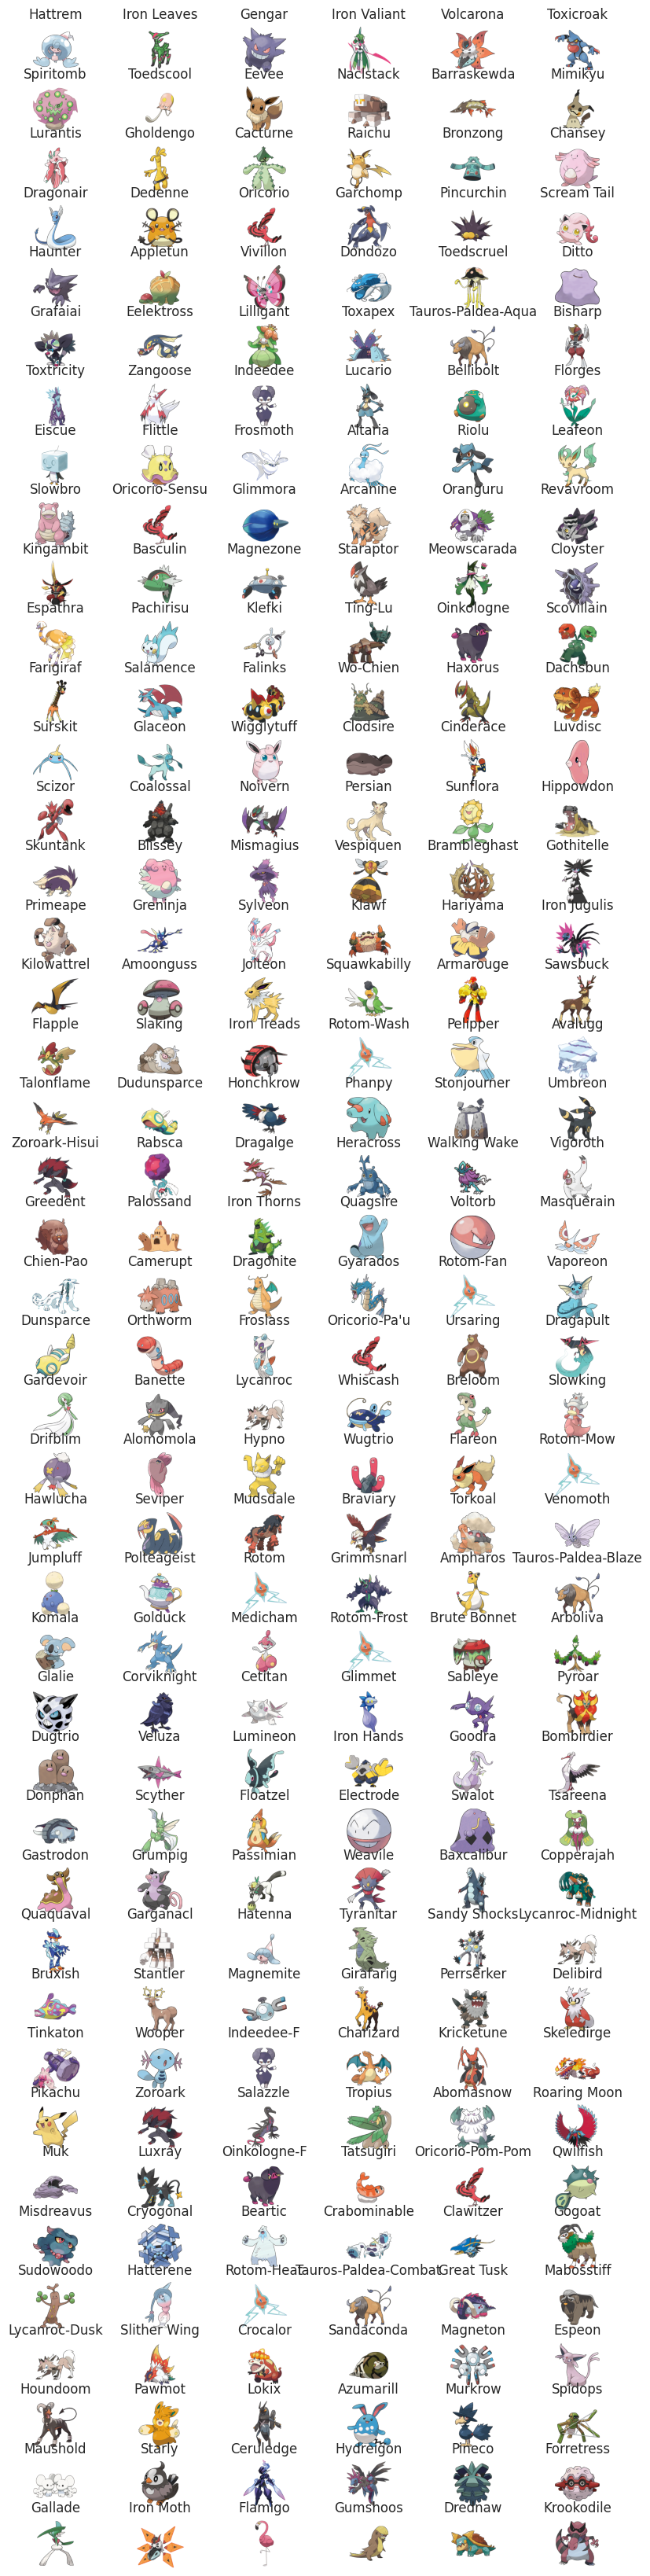

In [30]:
# print all pokemon images with their names in scrollable window

pokemon_names = df['Pokemon']
# print(pokemon_names)

fig, ax = plt.subplots(43, 6, figsize=(10, 42))
for i in range(0, 43):
    for j in range(0, 6):
        try:
            ax[i, j].imshow(plt.imread(f'./datasets/pokemon_images/{pokemon_names[i*6+j]}.png'))
            ax[i, j].set_title(pokemon_names[i*6+j])
            ax[i, j].axis('off')
        except:
            pass

#### Performing *`EDAs`* on the dataset to get a better understanding of the data

##### *`Null Check`* on the dataset

In [31]:
# check for duplicate pokemon
df[df.duplicated(subset=['Pokemon'])]

,Abilities,Pokemon,Usage,RowCount,Happiness,Viability Ceiling 0,Viability Ceiling 1,Viability Ceiling 2,Viability Ceiling 3,Teammates,...,atk,def,spa,spd,spe,bst,weight,height,color,Gender


In [32]:
# check for null values in the dataset
print('Null Values in the dataframe-', df.isnull().sum())

# check for NaN values in the dataframe
print('NaN Values in the dataframe-', df.isna().sum())

Null Values in the dataframe- Abilities              0
Pokemon                0
Usage                  0
RowCount               0
Happiness              0
Viability Ceiling 0    0
Viability Ceiling 1    0
Viability Ceiling 2    0
Viability Ceiling 3    0
Teammates              0
Types                  0
hp                     0
atk                    0
def                    0
spa                    0
spd                    0
spe                    0
bst                    0
weight                 0
height                 0
color                  0
Gender                 0
dtype: int64
NaN Values in the dataframe- Abilities              0
Pokemon                0
Usage                  0
RowCount               0
Happiness              0
Viability Ceiling 0    0
Viability Ceiling 1    0
Viability Ceiling 2    0
Viability Ceiling 3    0
Teammates              0
Types                  0
hp                     0
atk                    0
def                    0
spa                    0
spd

##### *`DataFrame`* Information

In [33]:
print('Columns in the dataframe-', df.columns)

print(df.describe())

Columns in the dataframe- Index(['Abilities', 'Pokemon', 'Usage', 'RowCount', 'Happiness',
       'Viability Ceiling 0', 'Viability Ceiling 1', 'Viability Ceiling 2',
       'Viability Ceiling 3', 'Teammates', 'Types', 'hp', 'atk', 'def', 'spa',
       'spd', 'spe', 'bst', 'weight', 'height', 'color', 'Gender'],
      dtype='object')
            Usage      RowCount  Viability Ceiling 0  Viability Ceiling 1  \
count  258.000000  2.580000e+02           258.000000           258.000000   
mean     0.023167  7.229883e+04          1898.127907            76.139535   
std      0.050626  1.572810e+05          3730.118353             9.777481   
min      0.000102  3.380000e+02             6.000000            44.000000   
25%      0.000799  2.605000e+03           102.500000            70.000000   
50%      0.003238  1.040050e+04           345.500000            77.000000   
75%      0.014283  4.513600e+04          1368.000000            85.000000   
max      0.395241  1.221604e+06         24137.00

##### *`Correlation`* between the features

/tmp/ipykernel_361/2470037192.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



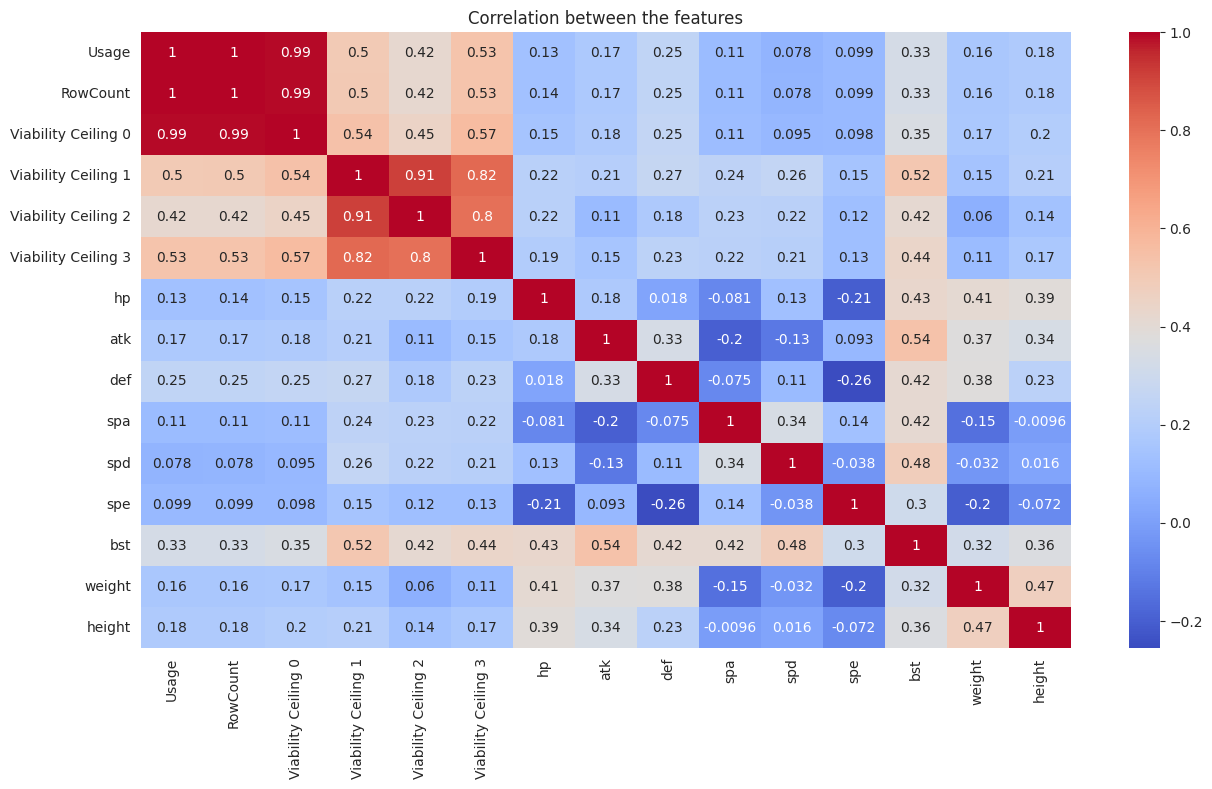

In [34]:
# heatmap of the dataframe to show distribution of correlation between the features
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the features')
plt.show()

##### *`Countplot of Pokemon Types`*

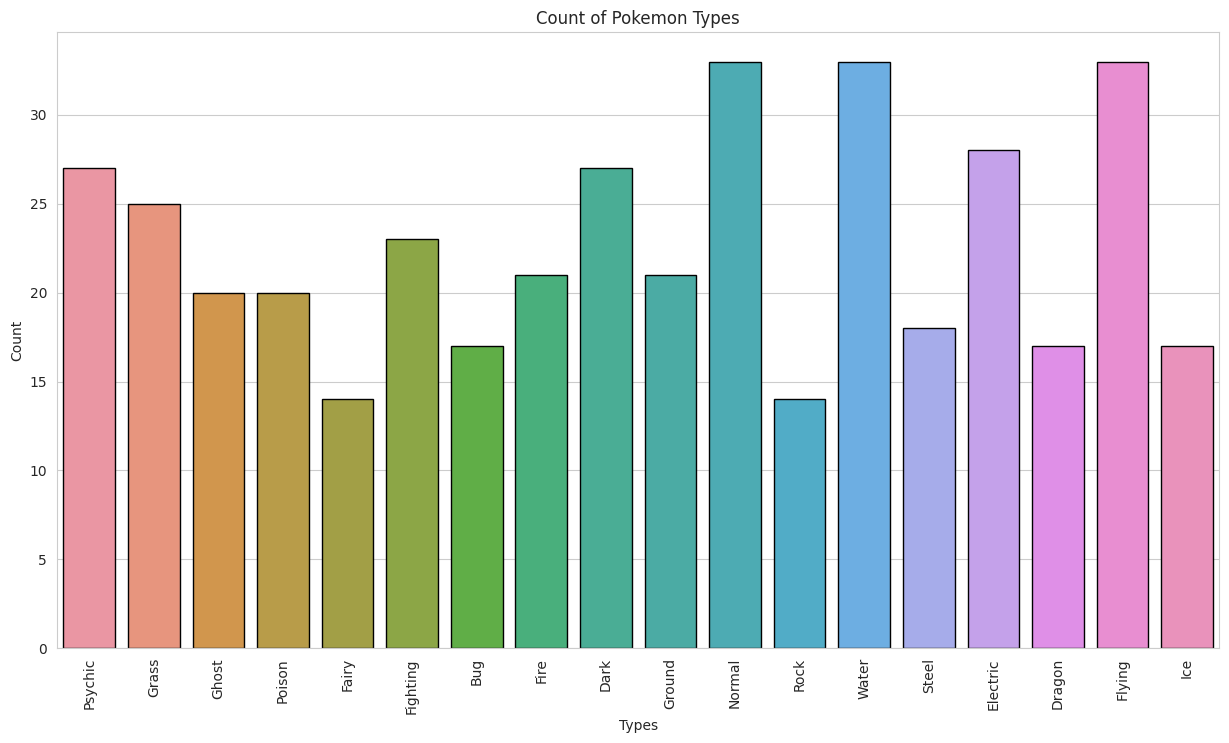

In [35]:
# countplot of the pokemon types
AllTypes = []
for i in df['Types']:
    for j in i:
        if j not in AllTypes:
            AllTypes.append(j)

AllTypes = pd.DataFrame(AllTypes, columns=['Types'])
AllTypes['Count'] = 0
for i in AllTypes['Types']:
    for j in df['Types']:
        if i in j:
            AllTypes.loc[AllTypes['Types'] == i, 'Count'] += 1

plt.figure(figsize=(15, 8))
sns.barplot(x='Types', y='Count', data=AllTypes, edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('Types')
plt.title('Count of Pokemon Types')
plt.show()

##### *`Most Used Pokemon Types`*

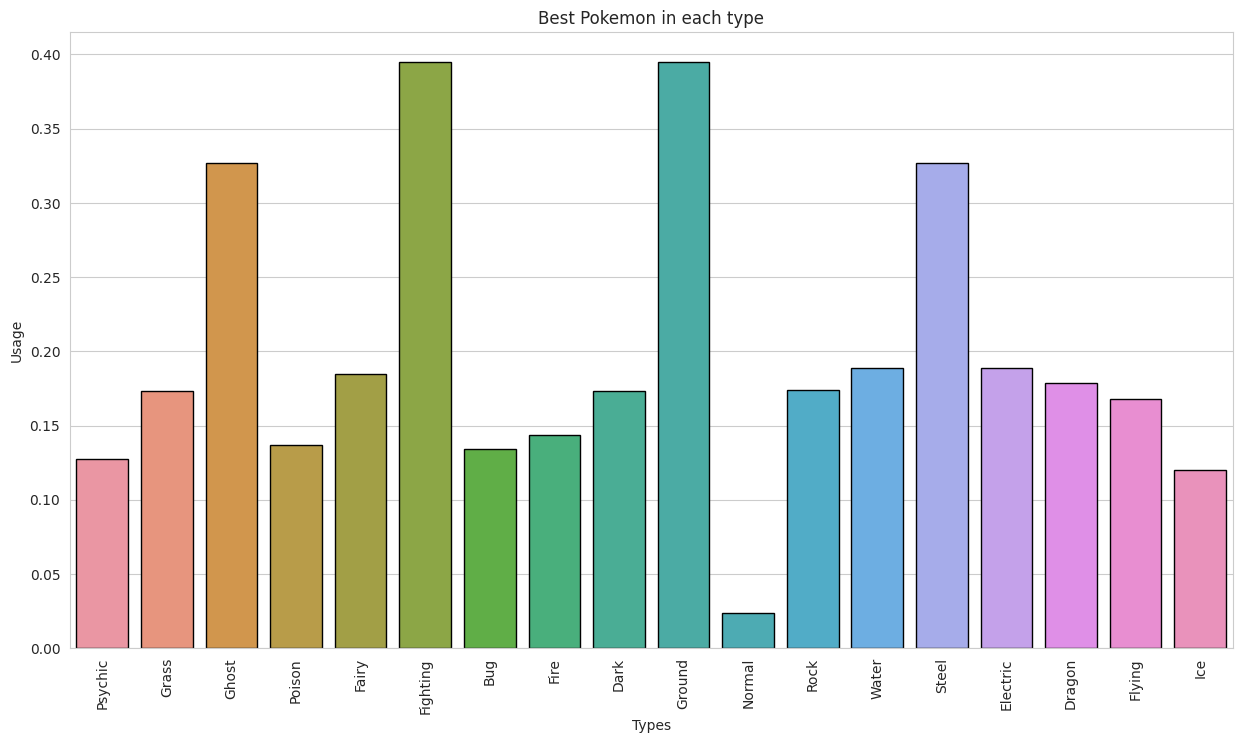

In [36]:
# Best pokemons in each type
BestPokemon = []
for i in AllTypes['Types']:
    BestPokemon.append(df.loc[df['Types'].apply(lambda x: i in x), 'Usage'].idxmax())

BestPokemon = pd.DataFrame(BestPokemon, columns=['BestPokemon'])
BestPokemon['Types'] = AllTypes['Types']
BestPokemon['Usage'] = 0
# load the usage of the best pokemon in each type
for i in BestPokemon['Types']:
    BestPokemon.loc[BestPokemon['Types'] == i, 'Usage'] = df.loc[df['Types'].apply(lambda x: i in x), 'Usage'].max()

plt.figure(figsize=(15, 8))
sns.barplot(x='Types', y='Usage', data=BestPokemon, edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.xlabel('Types')
plt.title('Best Pokemon in each type')
plt.show()

##### *`Best Pokemon`* in each type for *`Attack`*, *`Defense`*, *`Sp. Atk`*, *`Sp. Def`*, *`Speed`* and *`Hp`*

In [37]:
# Attack
BestAttack = []
for i in AllTypes['Types']:
    BestAttack.append(df.loc[df['Types'].apply(lambda x: i in x), 'atk'].idxmax())

BestAttack = pd.DataFrame(BestAttack, columns=['BestAttack'])
BestAttack['Types'] = AllTypes['Types']
BestAttack['atk'] = 0
for i in BestAttack['Types']:
    BestAttack.loc[BestAttack['Types'] == i, 'atk'] = df.loc[df['Types'].apply(lambda x: i in x), 'atk'].max()

# Defense
BestDefense = []
for i in AllTypes['Types']:
    BestDefense.append(df.loc[df['Types'].apply(lambda x: i in x), 'def'].idxmax())

BestDefense = pd.DataFrame(BestDefense, columns=['BestDefense'])
BestDefense['Types'] = AllTypes['Types']
BestDefense['def'] = 0
for i in BestDefense['Types']:
    BestDefense.loc[BestDefense['Types'] == i, 'def'] = df.loc[df['Types'].apply(lambda x: i in x), 'def'].max()

# Speed
BestSpeed = []
for i in AllTypes['Types']:
    BestSpeed.append(df.loc[df['Types'].apply(lambda x: i in x), 'spe'].idxmax())

BestSpeed = pd.DataFrame(BestSpeed, columns=['BestSpeed'])
BestSpeed['Types'] = AllTypes['Types']

BestSpeed['spe'] = 0
for i in BestSpeed['Types']:
    BestSpeed.loc[BestSpeed['Types'] == i, 'spe'] = df.loc[df['Types'].apply(lambda x: i in x), 'spe'].max()

# Special Attack
BestSpAtk = []
for i in AllTypes['Types']:
    BestSpAtk.append(df.loc[df['Types'].apply(lambda x: i in x), 'spa'].idxmax())

BestSpAtk = pd.DataFrame(BestSpAtk, columns=['BestSpAtk'])
BestSpAtk['Types'] = AllTypes['Types']
BestSpAtk['spa'] = 0
for i in BestSpAtk['Types']:
    BestSpAtk.loc[BestSpAtk['Types'] == i, 'spa'] = df.loc[df['Types'].apply(lambda x: i in x), 'spa'].max()

# Special Defense
BestSpDef = []
for i in AllTypes['Types']:
    BestSpDef.append(df.loc[df['Types'].apply(lambda x: i in x), 'spd'].idxmax())

BestSpDef = pd.DataFrame(BestSpDef, columns=['BestSpDef'])
BestSpDef['Types'] = AllTypes['Types']
BestSpDef['spd'] = 0
for i in BestSpDef['Types']:
    BestSpDef.loc[BestSpDef['Types'] == i, 'spd'] = df.loc[df['Types'].apply(lambda x: i in x), 'spd'].max()

# HP
BestHP = []
for i in AllTypes['Types']:
    BestHP.append(df.loc[df['Types'].apply(lambda x: i in x), 'hp'].idxmax())

BestHP = pd.DataFrame(BestHP, columns=['BestHP'])
BestHP['Types'] = AllTypes['Types']
BestHP['hp'] = 0
for i in BestHP['Types']:
    BestHP.loc[BestHP['Types'] == i, 'hp'] = df.loc[df['Types'].apply(lambda x: i in x), 'hp'].max()

# plotting the best pokemon in each type for each feature in a bar plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=BestAttack['Types'],
    y=BestAttack['atk'],
    name='Attack',
    marker_color='red',
    text=df.loc[BestAttack['BestAttack'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestDefense['Types'],
    y=BestDefense['def'],
    name='Defense',
    marker_color='blue',
    text=df.loc[BestDefense['BestDefense'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestSpeed['Types'],
    y=BestSpeed['spe'],
    name='Speed',
    marker_color='green',
    text=df.loc[BestSpeed['BestSpeed'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestSpAtk['Types'],
    y=BestSpAtk['spa'],
    name='Special Attack',
    marker_color='yellow',
    text=df.loc[BestSpAtk['BestSpAtk'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestSpDef['Types'],
    y=BestSpDef['spd'],
    name='Special Defense',
    marker_color='purple',
    text=df.loc[BestSpDef['BestSpDef'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.add_trace(go.Bar(
    x=BestHP['Types'],
    y=BestHP['hp'],
    name='HP',
    marker_color='orange',
    text=df.loc[BestHP['BestHP'], 'Pokemon'],
    textposition='auto',
    textfont=dict(
        family="sans serif",
        size=12,
        color="black"
    )
))

fig.update_layout(
    title='Best Stats in Each Type',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Stat',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.show()

##### *`Distribution of Pokemon weights and heights`*

/tmp/ipykernel_361/269200424.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_361/269200424.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




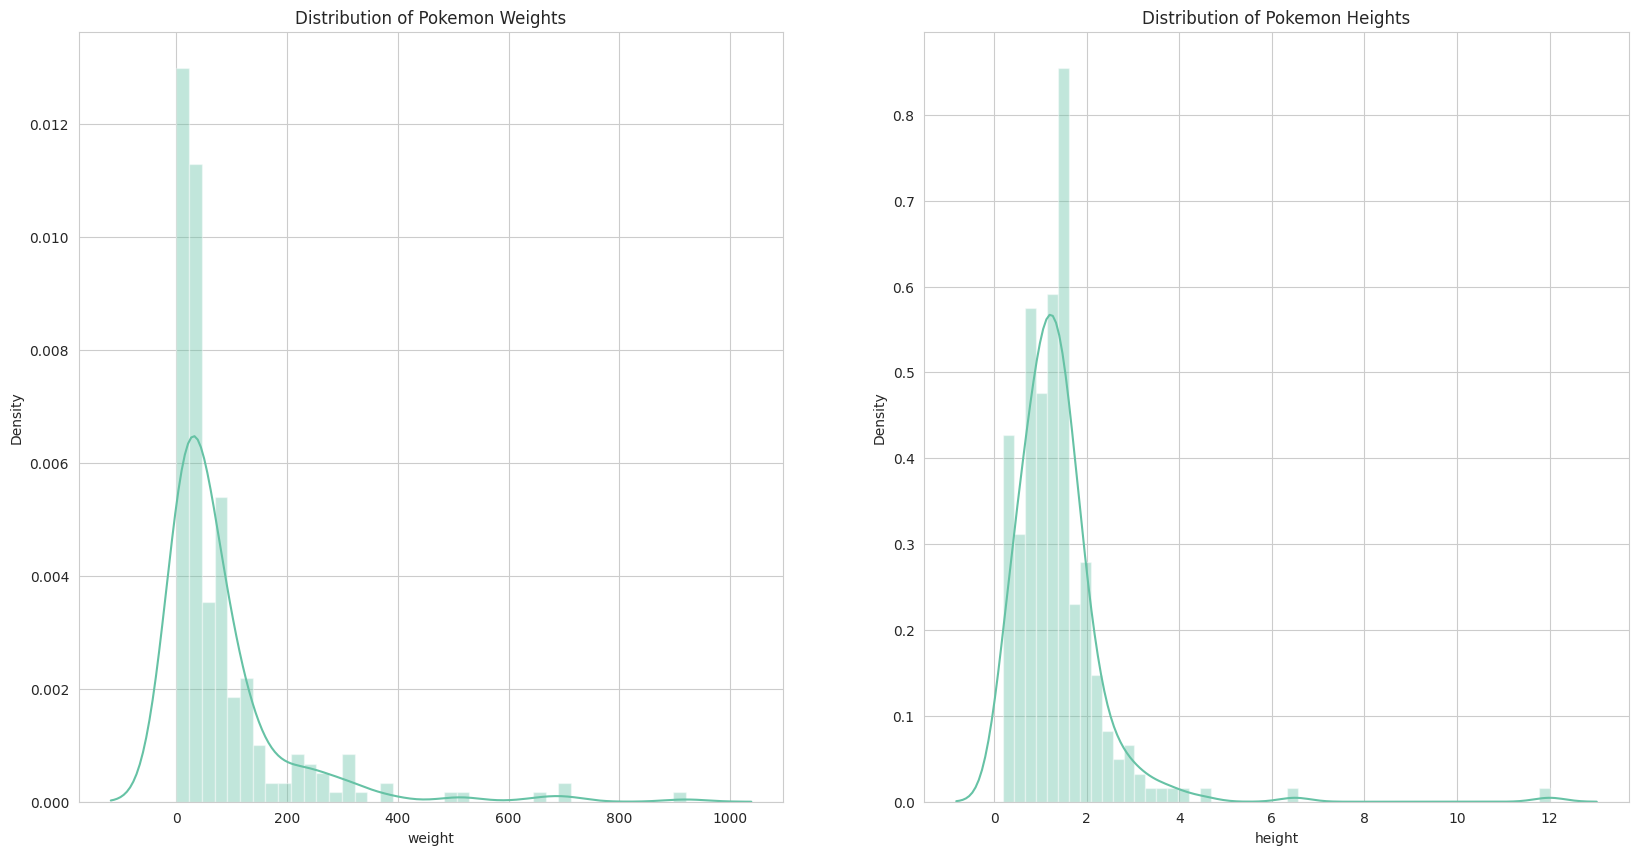

In [38]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(df['weight'], ax=ax[0])
sns.distplot(df['height'], ax=ax[1])
ax[0].set_title('Distribution of Pokemon Weights')
ax[1].set_title('Distribution of Pokemon Heights')
plt.show()

#### Changing the dataset to do `Regression` on the dataset

In [39]:
with open('./datasets/viability.json') as f:
    viability = json.load(f)

dic = {}
pokemon_viability = []
for i in viability:
    for j in viability[i]:
        pokemon_viability.append(j)
        dic[j] = i



df = df.drop(['Abilities', 'Usage', 'Happiness', 'Teammates', 'Types', 'color', 'Gender'], axis=1)
# extract those records only from the original dataset whose pokemon name is in the pokemon_viability list
extracted_df = df.loc[df['Pokemon'].isin(pokemon_viability)]
# extracted_df = extracted_df.drop(['Pokemon'], axis=1)

# adding a new column to the extracted_df dataframe called viability_rank according to the viability dictionary
extracted_df['viability_rank'] = extracted_df['Pokemon'].map(dic)

extracted_df['viability_rank']
extracted_df = extracted_df.drop(['Pokemon'], axis=1)
df = extracted_df

# lets map with float values to make it regressor model
rating_map = {'S': 1, 'S-': 0.95, 'A+': 0.85, 'A': 0.75, 'A-': 0.65, 'B+': 0.55, 'B': 0.45, 'B-': 0.35, 'C+': 0.2, 'C': 0.1, 'C-': 0}
df['viability_rank'] = df['viability_rank'].map(rating_map)
df

/tmp/ipykernel_361/1854454439.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,RowCount,Viability Ceiling 0,Viability Ceiling 1,Viability Ceiling 2,Viability Ceiling 3,hp,atk,def,spa,spd,spe,bst,weight,height,viability_rank
1,34661,1178,86,76,60,90,130,88,70,108,104,590,125.0,1.5,0.20
3,574225,14136,90,78,62,74,130,90,120,60,116,590,35.0,1.4,0.85
4,417611,10309,87,79,62,85,60,65,135,105,100,550,46.0,1.6,0.95
10,42560,1296,81,75,59,61,123,60,60,50,136,490,30.0,1.3,0.10
11,51524,1536,83,69,55,55,90,80,50,105,96,476,0.7,0.2,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,297313,8096,86,76,59,75,125,80,60,100,85,525,62.0,1.6,0.55
249,112745,3116,87,80,61,92,105,90,125,90,98,600,160.0,1.8,0.65
252,55985,1543,83,73,58,68,125,65,65,115,80,518,52.0,1.6,0.10
253,289702,7441,87,78,61,80,70,60,140,110,110,570,36.0,1.2,0.65


In [40]:
anuj = {'S': 1, 'S-': 0.95, 'A+': 0.85, 'A': 0.75, 'A-': 0.65, 'B+': 0.55, 'B': 0.45, 'B-': 0.35, 'C+': 0.2, 'C': 0.1, 'C-': 0}

for i in anuj:
    print("class", i, "-->", anuj[i])

class S --> 1
class S- --> 0.95
class A+ --> 0.85
class A --> 0.75
class A- --> 0.65
class B+ --> 0.55
class B --> 0.45
class B- --> 0.35
class C+ --> 0.2
class C --> 0.1
class C- --> 0


##### `Dividing` the dataset into `train` and `test` sets

In [41]:
# divide the data into two groups test and train
train, test = train_test_split(df, test_size=0.2, random_state=42)

train_y = train['viability_rank']
train_x = train.drop(['viability_rank'], axis=1)
test_y = test['viability_rank']
test_x = test.drop(['viability_rank'], axis=1)

#### `Linear Regression`

In [42]:
LR = LinearRegression()
LR.fit(train_x, train_y)
pred_lr = LR.predict(test_x)

# show the score and the mean squared error
print('Test Score: ', LR.score(test_x, test_y))
print('Train Score: ', LR.score(train_x, train_y))
print('Mean squared error: %.2f' % mean_squared_error(test_y, pred_lr))

Test Score:  0.7160229104586646
Train Score:  0.8562465459312325
Mean squared error: 0.02


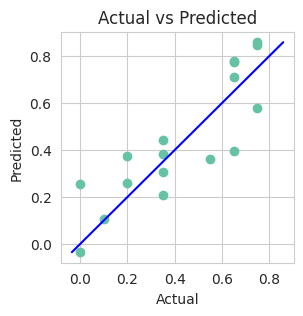

In [43]:
# visualize the actual and predicted values

plt.scatter(test_y, pred_lr)

p1 = max(max(pred_lr), max(test_y))
p2 = min(min(pred_lr), min(test_y))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Actual vs Predicted')
plt.show()

#### `Neural Network`

In [44]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score as R2_score

model = MLPRegressor(hidden_layer_sizes=(128, 8), activation='relu', solver='adam', max_iter=200)
model.fit(train_x, train_y)

print('Test Score: ', R2_score(test_y, model.predict(test_x)))
print('Train Score: ', model.score(train_x, train_y))
print('Mean squared error: %.2f' % mean_squared_error(test_y, model.predict(test_x)))

Test Score:  -11587145.647523401
Train Score:  -7976866.405654163
Mean squared error: 766996.94


#### `random forest regressor` with `xgboost`

In [45]:
# random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(train_x, train_y)

print('Test Score of Random Forest: ', R2_score(test_y, model.predict(test_x)))
print('Train Score of Random Forest: ', model.score(train_x, train_y))


#XGBoost
from xgboost import XGBRegressor as XGBoost

model = XGBoost(n_estimators=100, max_depth=10, random_state=42, learning_rate=0.1)
model.fit(train_x, train_y)

print('Test Score of XGBoost: ', R2_score(test_y, model.predict(test_x)))
print('Train Score of XGBoost: ', model.score(train_x, train_y))



Test Score of Random Forest:  0.8519269341348664
Train Score of Random Forest:  0.9690955240369196
Test Score of XGBoost:  0.8500620565580872
Train Score of XGBoost:  0.9999966610463195


#### `Feature Importance` of the `xgboost` model

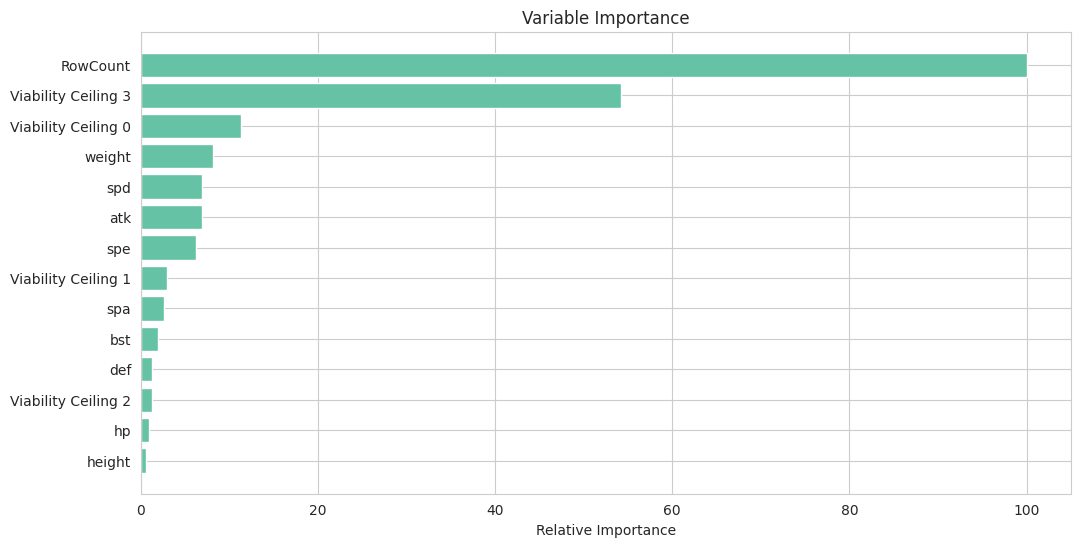

In [46]:
# extracting the feature importance from the model
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# sorting it to present in a descending order
sorted_idx = np.argsort(feature_importance)

# arrange the columns in a descending order
pos = np.arange(sorted_idx.shape[0]) + .5

# plotting 
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_x.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()



### `Battle Stats` Classification

#### Loading `Image` dataset

In [47]:
display(winners := pd.read_csv('datasets/clean/winners.tsv', header=None, index_col=None, sep='\t').values)
labels = winners[:, -1]
entries = winners[:, :-1]
train_X, test_X, train_y, test_y = train_test_split(entries, labels, test_size=0.3)

array([[7.500e+01, 1.100e+02, 1.050e+02, ..., 1.063e+03, 1.000e+03,
        1.000e+00],
       [8.500e+01, 6.000e+01, 1.000e+02, ..., 1.591e+03, 1.537e+03,
        0.000e+00],
       [3.500e+01, 5.500e+01, 4.000e+01, ..., 1.569e+03, 1.680e+03,
        0.000e+00],
       ...,
       [7.400e+01, 7.500e+01, 7.000e+01, ..., 1.000e+03, 1.000e+03,
        0.000e+00],
       [2.000e+01, 1.000e+01, 5.500e+01, ..., 1.000e+03, 1.000e+03,
        0.000e+00],
       [6.800e+01, 6.400e+01, 6.000e+01, ..., 1.000e+03, 1.000e+03,
        1.000e+00]])

#### `Laso` Regression

In [48]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = Lasso(alpha=0.01).fit(train_X, train_y)
display(lr.score(test_X, test_y))
display(lr.score(train_X, train_y))

testx, testy = list(zip(*sorted(list(zip(test_X, test_y)), key=lambda x: x[1])))
predy = lr.predict(testx)

0.0020915668365955042

0.04209011652204975

#### `Decision Tree Regressor`

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

regressor = DecisionTreeClassifier()
regressor.fit(train_X, train_y.astype(int))
regressor.score(test_X, test_y.astype(int))


0.5470136014192786

precision: 0.5047169811320755
recall: 0.5270935960591133
f1: 0.5156626506024098
accuracy: 0.524541691306919


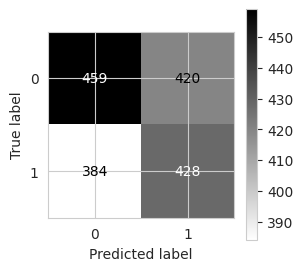

In [50]:
# visualize the actual and predicted values in a confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

predy = regressor.predict(test_X)
plt.rcParams['figure.figsize'] = [3, 3]

testy = [int(x) for x in testy]
disp = ConfusionMatrixDisplay(confusion_matrix(testy, predy))
disp.plot(cmap='binary')
print(f'precision: {precision_score(testy, predy)}')
print(f'recall: {recall_score(testy, predy)}')
print(f'f1: {f1_score(testy, predy)}')
print(f'accuracy: {accuracy_score(testy, predy)}')



#### `EDA on Image dataset`

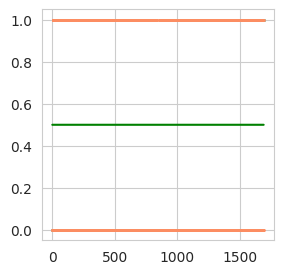

In [51]:
from matplotlib import pyplot as plt

plt.scatter(range(len(testy)), testy, s=1)
plt.scatter(range(len(testy)), predy, s=1)
plt.plot(range(len(testy)), [0.5]*len(testy), c='g')


In [52]:
# import umap

# reducer = umap.UMAP()
# embedding = reducer.fit_transform(train_X)


In [53]:
# plt.scatter(
#   embedding[:, 0],
#   embedding[:, 1],
#   c=[['r', 'b'][int(x)] for x in train_y],
#   s=1)
# plt.gca().set_aspect('equal', 'datalim')


In [54]:
# import sklearn

# embedding = sklearn.decomposition.PCA(n_components=2).fit_transform(train_X)


In [55]:
# plt.scatter(
#   embedding[:, 0],
#   embedding[:, 1],
#   c=[['r', 'b'][int(x)] for x in train_y],
#   s=1)
# plt.gca().set_aspect('equal', 'datalim')

#### `Preprocessing` the `Image` dataset

In [56]:
import json

import numpy as np

ti, tl, tei, tel = [], [], [], []
for SLICESIZE in [5, 10, 15, 20]:
	with open(f'datasets/clean/slices_{SLICESIZE}.json') as fl:
		_data = json.load(fl)

	# extract the images and labels
	train_images, train_labels = list(zip(
		*[(np.array(img), label) for img, label in
			zip(_data['train_X'], _data['train_y'])
			if np.array(img).shape == np.array(_data['train_X'][0]).shape]
	))

	test_images, test_labels = list(zip(
		*[(np.array(img), label) for img, label in
			zip(_data['test_X'], _data['test_y'])
			if np.array(img).shape == np.array(_data['test_X'][0]).shape]
	))

	train_labels, test_labels = np.array(train_labels, dtype=int), np.array(test_labels, dtype=int)

	# normalize the images
	img = np.mean(train_images, axis=0)
	train_images = [x / img.max(axis=0) for x in train_images]
	test_images = [x / img.max(axis=0) for x in test_images]
	train_images, test_images = np.array(train_images), np.array(test_images)

	# making slices of the images
	train_images = train_images.reshape(len(train_labels), SLICESIZE, 38, 1)
	test_images = test_images.reshape(len(test_labels), SLICESIZE, 38, 1)

	# storing the slices in a list for later use
	ti.append(train_images)
	tl.append(train_labels)
	tei.append(test_images)
	tel.append(test_labels)

#### `plotting the mean of all the slices` for each slice size

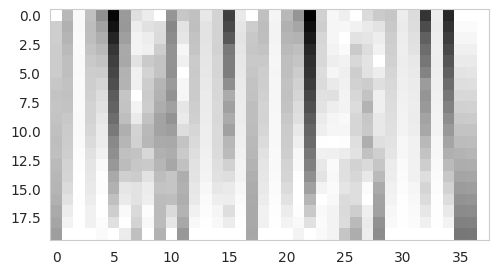

In [57]:
plt.figure(figsize=(10, 3))
# concatenate the slices
all_images = np.concatenate((train_images, test_images), axis=0)
img = np.mean(all_images, axis=0)
plt.grid(False)
plt.imshow(img / img.max(axis=0), cmap='gray')

# normalize the images
train_images = [x / img.max(axis=0) for x in train_images]
test_images = [x / img.max(axis=0) for x in test_images]
train_images, test_images = np.array(train_images), np.array(test_images)

#### `Global Libraries` and `Functions`

In [58]:
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping
from keras import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

# Global function to evaluate the classifier
def evaluate_classifier(y_true, y_pred):
  print(f'accuracy: {accuracy_score(np.squeeze(y_true), np.squeeze(y_pred))}')
  print(f'precision: {precision_score(np.squeeze(y_true), np.squeeze(y_pred))}')
  print(f'recall: {recall_score(np.squeeze(y_true), np.squeeze(y_pred))}')
  print(f'f1 score: {f1_score(np.squeeze(y_true), np.squeeze(y_pred))}')


2023-05-01 12:21:29.154491: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 12:21:30.553975: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/anuj/miniconda3/envs/tf/lib/
2023-05-01 12:21:30.555347: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/anuj/miniconda3/envs/tf/lib/
2023-05-01 12:21:30.555360: W tensorflow/compiler/tf2tenso

#### `CNN` Models on` slices`

In [60]:
# CNN on all the slices and storing the models in a list to later use them for ensembling

model_CNN = []
param_filter = [2, 4, 8, 8]
image_shape = [5, 10, 15, 20]

for i in range(0, len(image_shape)):
    train_X, train_y, test_X, test_y = ti[i], tl[i], tei[i], tel[i]
    mod = Sequential()
    mod.add(Conv2D(32, (param_filter[i], 26), activation='relu', input_shape=(image_shape[i], 38, 1)))
    mod.add(MaxPooling2D((2, 4)))
    mod.add(Conv2D(128, (2, 2), activation='relu'))
    # model.add(MaxPooling2D((2, 2)))
    mod.add(Flatten())
    mod.add(Dense(128, activation='relu'))
    mod.add(Dropout(0.4))
    mod.add(Dense(8, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(Dense(1, activation='sigmoid'))

    mod.compile(optimizer='adam', loss='binary_crossentropy', metrics=[], run_eagerly=True)

    # to avoid overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=3)

    history = mod.fit(train_X, train_y.astype(float), epochs=50, batch_size=256, validation_split=0.3, callbacks=[early_stop])

    model_CNN.append(mod)

Epoch 1/50
61/61 [==============================] - 4s 41ms/step - loss: 0.7009 - val_loss: 0.6928
Epoch 2/50
61/61 [==============================] - 2s 33ms/step - loss: 0.6931 - val_loss: 0.6926
Epoch 3/50
61/61 [==============================] - 2s 33ms/step - loss: 0.6929 - val_loss: 0.6926
Epoch 4/50
61/61 [==============================] - 2s 33ms/step - loss: 0.6928 - val_loss: 0.6925
Epoch 5/50
61/61 [==============================] - 2s 33ms/step - loss: 0.6918 - val_loss: 0.6920
Epoch 6/50
61/61 [==============================] - 2s 36ms/step - loss: 0.6918 - val_loss: 0.6913
Epoch 7/50
61/61 [==============================] - 2s 33ms/step - loss: 0.6919 - val_loss: 0.6881
Epoch 8/50
61/61 [==============================] - 2s 36ms/step - loss: 0.6884 - val_loss: 0.6862
Epoch 9/50
61/61 [==============================] - 2s 37ms/step - loss: 0.6806 - val_loss: 0.6772
Epoch 10/50
61/61 [==============================] - 2s 36ms/step - loss: 0.6700 - val_loss: 0.6635
Epoch 11/

296/296 [==============================] - 2s 6ms/step
accuracy: 0.5871520795851413
precision: 0.5546236108198784
recall: 0.5981456354590683
f1 score: 0.5755630508105756
296/296 [==============================] - 2s 7ms/step
-----------------------------------------------

217/217 [==============================] - 2s 6ms/step
accuracy: 0.5918219910417569
precision: 0.5185057073676929
recall: 0.5112551159618008
f1 score: 0.5148548857976988
217/217 [==============================] - 1s 6ms/step
-----------------------------------------------

170/170 [==============================] - 1s 6ms/step
accuracy: 0.6019506808980494
precision: 0.5807573415765069
recall: 0.5823324292909725
f1 score: 0.5815438189204875
170/170 [==============================] - 1s 6ms/step
-----------------------------------------------

120/120 [==============================] - 1s 8ms/step
accuracy: 0.4566579634464752
precision: 1.0
recall: 0.4566579634464752
f1 score: 0.6269940849614627
120/120 [==============

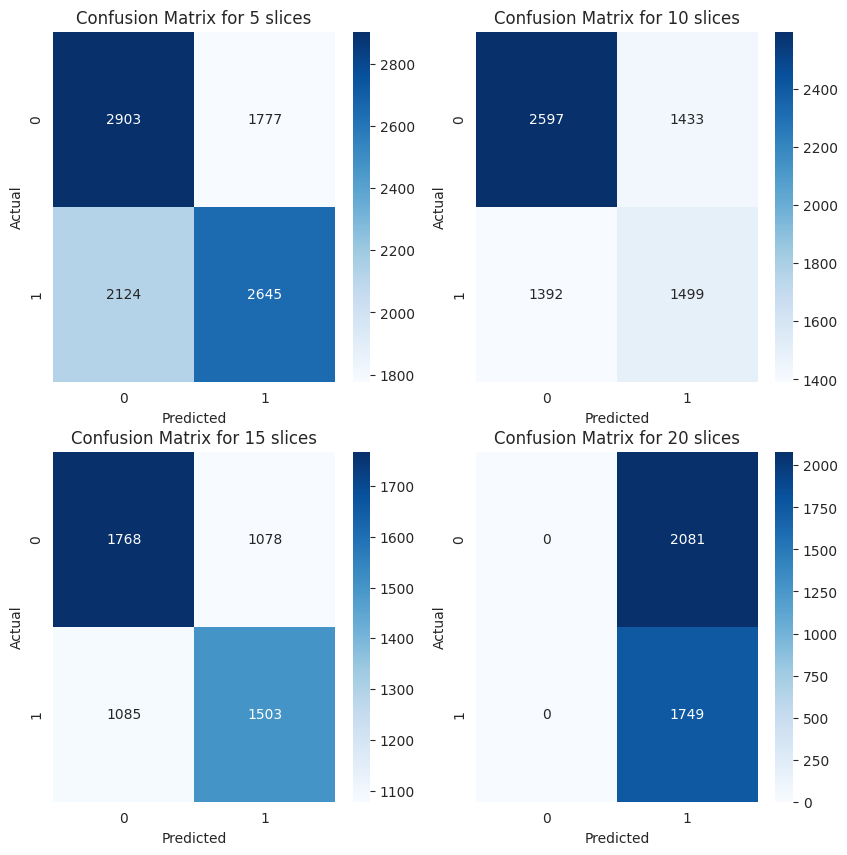

In [61]:
# plotting the confusion matrix for each slice size and printing the evaluation metrics

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(0, len(image_shape)):
    train_X, train_y, test_X, test_y = ti[i], tl[i], tei[i], tel[i]
    evaluate_classifier(np.squeeze(np.round(model_CNN[i].predict(test_X))), test_y.astype(float))
    sns.heatmap(confusion_matrix(test_y, np.round(model_CNN[i].predict(test_X))), annot=True, fmt='d', cmap='Blues', ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].set_title(f'Confusion Matrix for {image_shape[i]} slices')
    ax[i // 2][i % 2].set_xlabel('Predicted')
    ax[i // 2][i % 2].set_ylabel('Actual')
    print('-----------------------------------------------')
    print()

#### `ANN` Models on` slices`

In [62]:
# ANN on all the slices and storing the models in a list to later use them for ensembling

model_ANN = []
param_filter = [2, 4, 8, 8]
image_shape = [5, 10, 15, 20]

for i in range(0, len(image_shape)):
    train_X, train_y, test_X, test_y = ti[i], tl[i], tei[i], tel[i]
    # val = tf.data.Dataset.from_tensor_slices((test_X, test_y)).batch(64)
    mod = Sequential()
    # mod.add(Conv2D(32, (param_filter[i], 26), activation='relu', input_shape=(image_shape[i], 38, 1)))
    # mod.add(MaxPooling2D((2, 4)))
    # mod.add(Conv2D(128, (2, 2), activation='relu'))
    # model.add(MaxPooling2D((2, 2)))
    mod.add(Flatten())
    mod.add(Dense(512, activation='relu'))
    mod.add(Dropout(0.5))
    mod.add(Dense(32, activation='relu'))
    mod.add(Dropout(0.2))
    mod.add(Dense(1, activation='sigmoid'))

    mod.compile(optimizer='adam', loss='binary_crossentropy', metrics=[], run_eagerly=True)

    # to avoid overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=3)

    history = mod.fit(train_X, train_y.astype(float), epochs=50, batch_size=256, validation_split=0.3, callbacks=[early_stop])

    model_ANN.append(mod)


Epoch 1/50
61/61 [==============================] - 3s 31ms/step - loss: 0.9351 - val_loss: 0.6924
Epoch 2/50
61/61 [==============================] - 2s 26ms/step - loss: 0.6990 - val_loss: 0.6917
Epoch 3/50
61/61 [==============================] - 2s 27ms/step - loss: 0.6958 - val_loss: 0.6901
Epoch 4/50
61/61 [==============================] - 2s 30ms/step - loss: 0.6909 - val_loss: 0.6842
Epoch 5/50
61/61 [==============================] - 2s 27ms/step - loss: 0.6844 - val_loss: 0.6735
Epoch 6/50
61/61 [==============================] - 2s 37ms/step - loss: 0.6763 - val_loss: 0.6663
Epoch 7/50
61/61 [==============================] - 1s 24ms/step - loss: 0.6723 - val_loss: 0.6628
Epoch 8/50
61/61 [==============================] - 1s 24ms/step - loss: 0.6662 - val_loss: 0.6541
Epoch 9/50
61/61 [==============================] - 2s 33ms/step - loss: 0.6569 - val_loss: 0.6492
Epoch 10/50
61/61 [==============================] - 2s 35ms/step - loss: 0.6539 - val_loss: 0.6504
Epoch 11/

296/296 [==============================] - 2s 5ms/step
accuracy: 0.630013758069637
precision: 0.6772908366533864
recall: 0.6227106227106227
f1 score: 0.6488549618320612
296/296 [==============================] - 1s 4ms/step
-----------------------------------------------

217/217 [==============================] - 1s 4ms/step
accuracy: 0.6468718393295767
precision: 0.6440677966101694
recall: 0.568202624351541
f1 score: 0.6037613488975356
217/217 [==============================] - 1s 5ms/step
-----------------------------------------------

170/170 [==============================] - 1s 5ms/step
accuracy: 0.6705925653294075
precision: 0.6619010819165378
recall: 0.6518264840182648
f1 score: 0.6568251533742331
170/170 [==============================] - 1s 4ms/step
-----------------------------------------------

120/120 [==============================] - 1s 5ms/step
accuracy: 0.6710182767624021
precision: 0.7381360777587193
recall: 0.6168179646440516
f1 score: 0.6720458094742322
120/120 [=

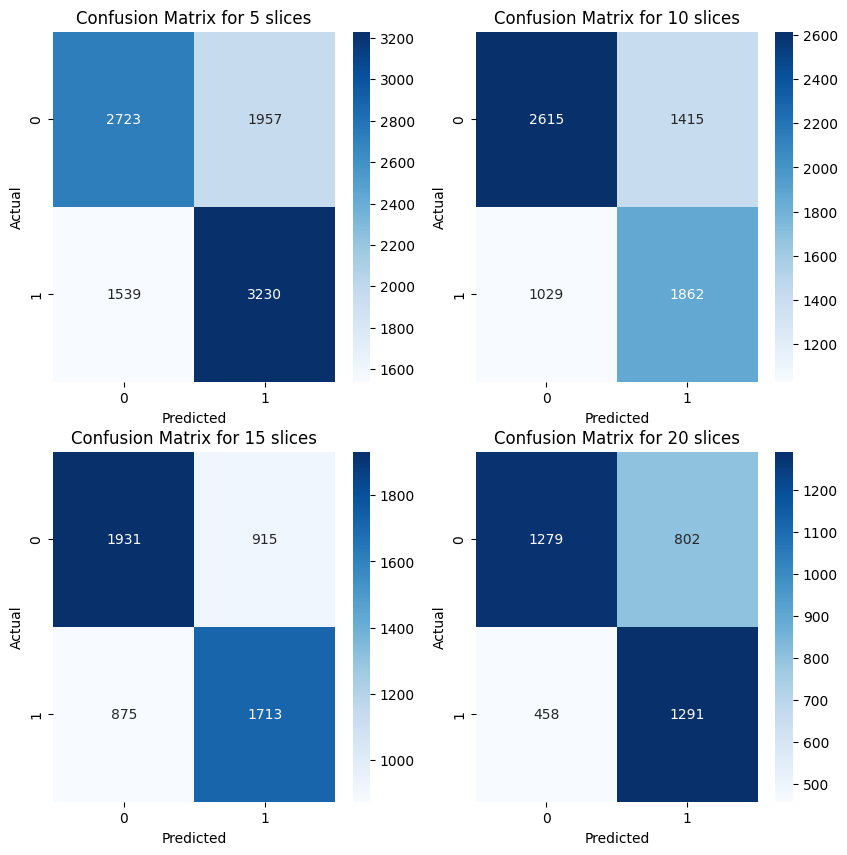

In [ ]:
# plotting the confusion matrix for each slice size and printing the evaluation metrics

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(0, len(image_shape)):
    train_X, train_y, test_X, test_y = ti[i], tl[i], tei[i], tel[i]
    evaluate_classifier(np.squeeze(np.round(model_ANN[i].predict(test_X))), test_y.astype(float))
    sns.heatmap(confusion_matrix(test_y, np.round(model_ANN[i].predict(test_X))), annot=True, fmt='d', cmap='Blues', ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].set_title(f'Confusion Matrix for {image_shape[i]} slices')
    ax[i // 2][i % 2].set_xlabel('Predicted')
    ax[i // 2][i % 2].set_ylabel('Actual')
    print('-----------------------------------------------')
    print()

#### `Random Forest` Models on` slices`

Confusion Matrix for 5 slices
accuracy: 0.6734045930786327
precision: 0.6275948836234011
recall: 0.6955612363467348
f1 score: 0.6598324514991182
-----------------------------------------------

Confusion Matrix for 10 slices
accuracy: 0.6754804219043491
precision: 0.6817710134901418
recall: 0.5978161965423112
f1 score: 0.6370394311570782
-----------------------------------------------

Confusion Matrix for 15 slices
accuracy: 0.7011409642988591
precision: 0.6568778979907264
recall: 0.6978653530377669
f1 score: 0.6767515923566879
-----------------------------------------------

Confusion Matrix for 20 slices
accuracy: 0.6989556135770235
precision: 0.6912521440823327
recall: 0.6635565312843029
f1 score: 0.677121254550546
-----------------------------------------------



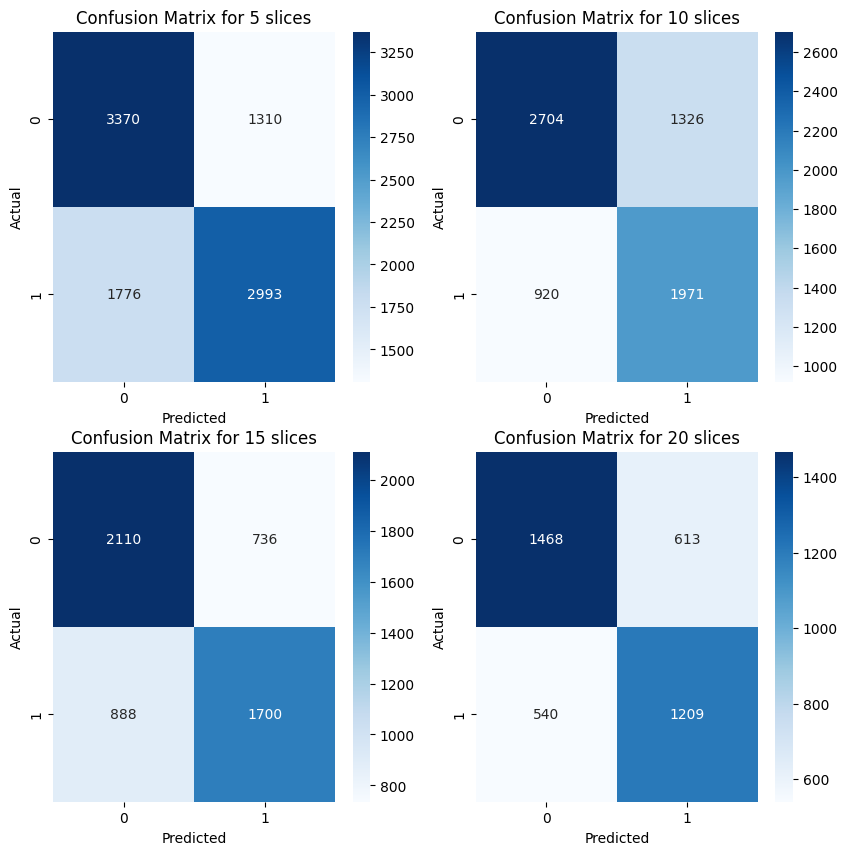

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RF on all the slices and storing the models in a list to later use them for ensembling

model_RF = []
param_filter = [2, 4, 8, 8]
slice = [5, 10, 15, 20]


fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(len(param_filter)):
    train_X, train_y, test_X, test_y = ti[i], tl[i], tei[i], tel[i]

    # taking cumulative sum of the slices and reshaping the data
    train_X = np.sum(train_X, axis=1)
    test_X = np.sum(test_X, axis=1)
    train_X = train_X.reshape(len(train_y), 38)
    test_X = test_X.reshape(len(test_y), 38)

    # training the model
    clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)

    # plotting the confusion matrix and printing the evaluation metrics
    print(f"Confusion Matrix for {slice[i]} slices")
    evaluate_classifier(y_pred, test_y)
    sns.heatmap(confusion_matrix(test_y, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].set_title(f'Confusion Matrix for {image_shape[i]} slices')
    ax[i // 2][i % 2].set_xlabel('Predicted')
    ax[i // 2][i % 2].set_ylabel('Actual')
    print('-----------------------------------------------')
    print()

    model_RF.append(clf)

#### `XGBClassifier` Models on` slices`

Confusion Matrix for 5 slices
accuracy: 0.649804212085935
precision: 0.6240301950094359
recall: 0.6625111308993766
f1 score: 0.6426951733074181
-----------------------------------------------

Confusion Matrix for 10 slices
accuracy: 0.6657997399219766
precision: 0.6848841231407817
recall: 0.5854523950325251
f1 score: 0.6312769010043041
-----------------------------------------------

Confusion Matrix for 15 slices
accuracy: 0.6764814133235186
precision: 0.6437403400309119
recall: 0.6658673061550759
f1 score: 0.6546168958742632
-----------------------------------------------

Confusion Matrix for 20 slices
accuracy: 0.7224543080939948
precision: 0.6981132075471698
recall: 0.6953302961275627
f1 score: 0.696718972895863
-----------------------------------------------



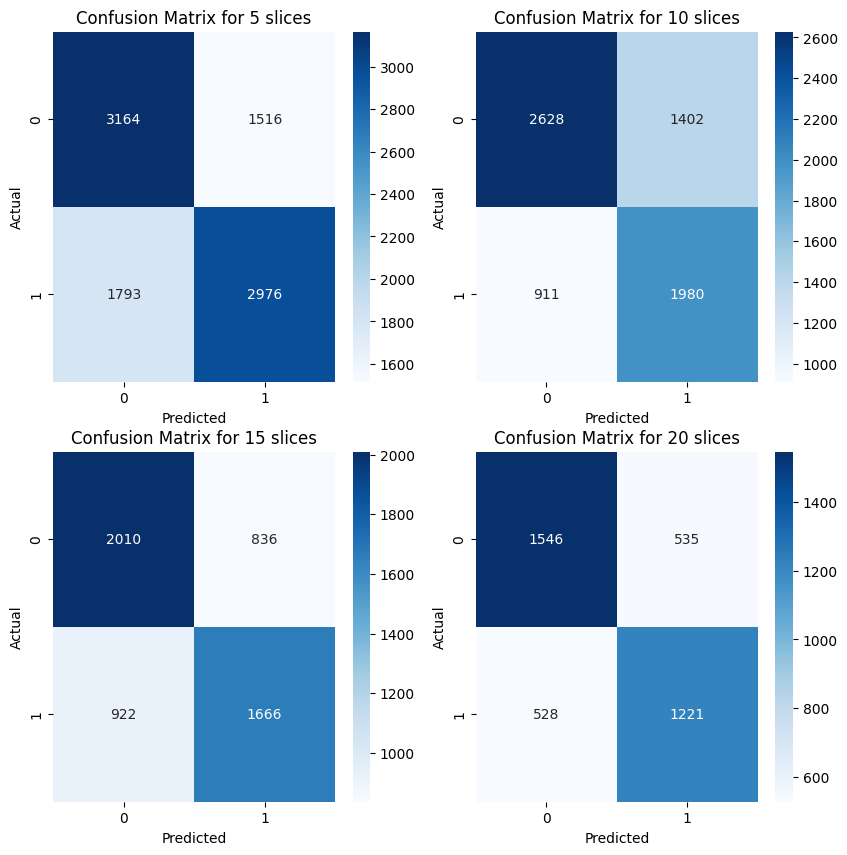

In [ ]:
from xgboost import XGBClassifier

# XGBoost on all the slices and storing the models in a list to later use them for ensembling
model_xgboost = []
param_filter = [2, 4, 8, 8]
slice = [5, 10, 15, 20]


fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(len(param_filter)):
    train_X, train_y, test_X, test_y = ti[i], tl[i], tei[i], tel[i]

    # taking cumulative sum of the slices and reshaping the data
    train_X = np.sum(train_X, axis=1)
    test_X = np.sum(test_X, axis=1)
    train_X = train_X.reshape(len(train_y), 38)
    test_X = test_X.reshape(len(test_y), 38)

    # training the model
    clf = XGBClassifier(n_estimators=200, max_depth=20, random_state=42)
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    

    # plotting the confusion matrix and printing the evaluation metrics
    print(f"Confusion Matrix for {slice[i]} slices")
    evaluate_classifier(y_pred, test_y)
    sns.heatmap(confusion_matrix(test_y, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax[i // 2][i % 2])
    ax[i // 2][i % 2].set_title(f'Confusion Matrix for {image_shape[i]} slices')
    ax[i // 2][i % 2].set_xlabel('Predicted')
    ax[i // 2][i % 2].set_ylabel('Actual')
    print('-----------------------------------------------')
    print()

    model_xgboost.append(clf)

#### `SVM` Models on` slices`

In [ ]:
# SVM
from sklearn.svm import SVC

# SVM on all the slices and storing the models in a list to later use them for ensembling
model_SVM = []
param_filter = [2, 4, 8, 8]
slice = [5, 10, 15, 20]
for i in range(len(param_filter)):
    train_X, train_y, test_X, test_y = ti[i], tl[i], tei[i], tel[i]

    # taking cumulative sum of the slices and reshaping the data
    train_X = np.sum(train_X, axis=1)
    test_X = np.sum(test_X, axis=1)

    train_X = train_X.reshape(len(train_y), 38)
    test_X = test_X.reshape(len(test_y), 38)

    # training the model
    clf = SVC(kernel='rbf', random_state=42)
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)

    # plotting the confusion matrix and printing the evaluation metrics
    print(f"Confusion Matrix for {slice[i]} slices")
    evaluate_classifier(y_pred, test_y)
    print('-----------------------------------------------')
    print()

    model_SVM.append(clf)

Confusion Matrix for 5 slices
accuracy: 0.6234522171658377
precision: 0.5397357936674355
recall: 0.6537973075946152
f1 score: 0.5913163335630599
-----------------------------------------------

Confusion Matrix for 10 slices
accuracy: 0.6279439387371767
precision: 0.6181252161881702
recall: 0.5484960098219767
f1 score: 0.5812327207676046
-----------------------------------------------

Confusion Matrix for 15 slices
accuracy: 0.6630474788369525
precision: 0.6093508500772797
recall: 0.6579057154776804
f1 score: 0.6326980942828485
-----------------------------------------------

Confusion Matrix for 20 slices
accuracy: 0.6741514360313315
precision: 0.6838193253287593
recall: 0.632469592808038
f1 score: 0.6571428571428571
-----------------------------------------------

